In [1]:
import numpy as np
import matplotlib.pyplot as plt

import finesse
from finesse.utilities.xaxis import xaxis, x2axis, noxaxis # convenience functions for running simulations over data ranges
from finesse.frequency import generate_frequency_list

finesse.plotting.init() # initialise matplotlib rcParams to appropriate values for a "display" mode
finesse.LOGGER.setLevel("WARN")

## Finesse 3 Introduction --- Michelson interferometer

This notebook is intended as an introduction to the Finesse 3 syntax and features by way of an example of a simple Michelson interferometer. See `finesse3/examples/fabry_perot.ipynb` for an example of a Fabry-Perot cavity model.

**Key Points**

- In the Fabry-Perot example we showed how parameters can be referenced using the `$` syntax in `.kat` files. From this notebook, one can
  see that this tracking is also possible through direct manipulation of the model parameters themselves. The general syntax for this is:
  
```
<model>.<component>.<parameter> = <function_of> <model>.<component>.<parameter>.ref
```
    
  e.g. To set the detuning parameter of the YARM mirror of a Michelson to track minus the detuning parameter of the XARM mirror
  (differential motion), one would write:
  
```
ifo.mY.phi = -1.0 * ifo.mX.phi.ref
```

In [2]:
ifo = finesse.parse("""
l L0 1 0 n0
s si 1 n0 nBSc

bs BS 0.5 0.5 0 45 nBSc nBSx nBSy nBSd

s LX 1 nBSx nmX1
m mX 1 0 0 nmX1 nmX2

s LY 1 nBSy nmY1
m mY 1 0 90 nmY1 nmY2

ad amp_out 0 nBSd
""")

Now that the model is built, we can perform simulation tasks on it. In the cell below we use the symbol / reference of the parameter `mX.phi` to force the parameter `mY.phi` to track the -`mX.phi`. When scanning over `mX.phi` in the `xaxis` function, the value of `mY.phi` at each data point of the simulation is then automatically set to minus the value of `mX.phi` for that point. This is equivalent to using the `put` command in Finesse 2, but is more convenient and allows for much more flexibility in terms of the options available for setting up more complicated equations dependent upon multiple parameters.

This is identical to the tracking we saw in `finesse3/examples/fabry_perot.ipynb` but instead of using the `$` syntax in the `.kat` code, we manipulate the symbols directly via access to the parameters and their `ref` properties.

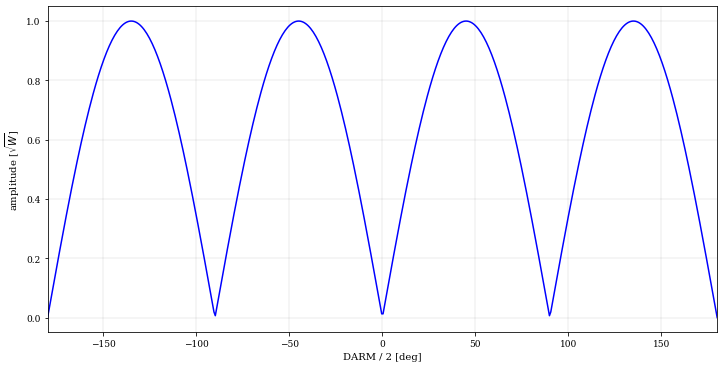

In [3]:
# use symbols to create differential motion with Michelson operating on dark fringe
ifo.mY.phi = 90 - ifo.mX.phi.ref
out = xaxis(ifo.mX.phi, -180, 180, 500)

fig = plt.figure(figsize=(12, 6))
plt.plot(out.x1, abs(out["amp_out"]))
plt.xlabel("DARM / 2 [deg]")
plt.ylabel("amplitude [$\sqrt{W}$]");